In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df= pd.read_csv("DATA.csv")

In [ ]:
df.head(10)

Patient_ID       Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0         P0                   None        False         True           True   
1         P1                  Fever         True        False           True   
2         P2                  Fever        False         True           True   
3         P3                   None         True        False          False   
4         P4    Swollen Lymph Nodes         True         True           True   
5         P5    Swollen Lymph Nodes        False         True          False   
6         P6                  Fever        False         True          False   
7         P7                  Fever         True         True          False   
8         P8  Muscle Aches and Pain        False         True           True   
9         P9                  Fever        False        False           True   

   Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0          True            False             True          False   
1          True            False            False           True   
2         False            False            False           True   
3         False             True             True           True   
4         False            False             True           True   
5         False            False            False          False   
6         False            False            False           True   
7          True             True             True          False   
8          True            False            False          False   
9          True             True            False           True   

   Sexually Transmitted Infection MonkeyPox  
0                           False  Negative  
1                           False  Positive  
2                           False  Positive  
3                           False  Positive  
4                           False  Positive  
5                           False  Negative  
6                           False  Positive  
7                           False  Positive  
8                           False  Positive  
9                           False  Negative

# **Data Pre-Processing**

In [ ]:
df.isnull().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [ ]:
df.drop(labels='Patient_ID', axis=1, inplace=True)
df.head()

Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0                 None        False         True           True          True   
1                Fever         True        False           True          True   
2                Fever        False         True           True         False   
3                 None         True        False          False         False   
4  Swollen Lymph Nodes         True         True           True         False   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0            False             True          False   
1            False            False           True   
2            False            False           True   
3             True             True           True   
4            False             True           True   

   Sexually Transmitted Infection MonkeyPox  
0                           False  Negative  
1                           False  Positive  
2                           False  Positive  
3                           False  Positive  
4                           False  Positive

In [ ]:
df = df.replace(["Positive", "Negative", True, False], [1,0,1,0])
df.head()

Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0                 None            0            1              1             1   
1                Fever            1            0              1             1   
2                Fever            0            1              1             0   
3                 None            1            0              0             0   
4  Swollen Lymph Nodes            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  
0                               0          0  
1                               0          1  
2                               0          1  
3                               0          1  
4                               0          1

In [ ]:
df=pd.get_dummies(df,columns=['Systemic Illness'], drop_first= True)
df.head()

Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  Solitary Lesion  \
0            0            1              1             1                0   
1            1            0              1             1                0   
2            0            1              1             0                0   
3            1            0              0             0                1   
4            1            1              1             0                0   

   Swollen Tonsils  HIV Infection  Sexually Transmitted Infection  MonkeyPox  \
0                1              0                               0          0   
1                0              1                               0          1   
2                0              1                               0          1   
3                1              1                               0          1   
4                1              1                               0          1   

   Systemic Illness_Muscle Aches and Pain  Systemic Illness_None  \
0                                       0                      1   
1                                       0                      0   
2                                       0                      0   
3                                       0                      1   
4                                       0                      0   

   Systemic Illness_Swollen Lymph Nodes  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     1

In [ ]:
df['MonkeyPox'].value_counts()

1    15909
0     9091
Name: MonkeyPox, dtype: int64

#**Exploratory Data Analysis**



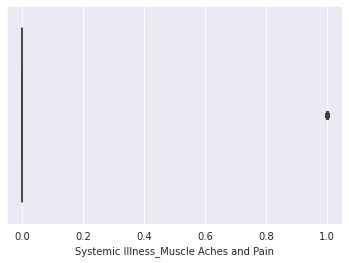

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(x = df['Systemic Illness_Muscle Aches and Pain']);

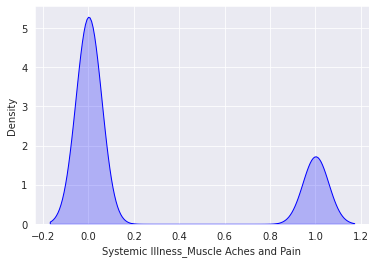

In [ ]:
sns.kdeplot(x = 'Systemic Illness_Muscle Aches and Pain', data = df, color = 'blue', shade = True)

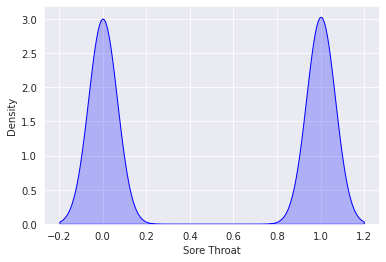

In [ ]:
sns.kdeplot(x = 'Sore Throat', data = df, color = 'blue', shade = True)

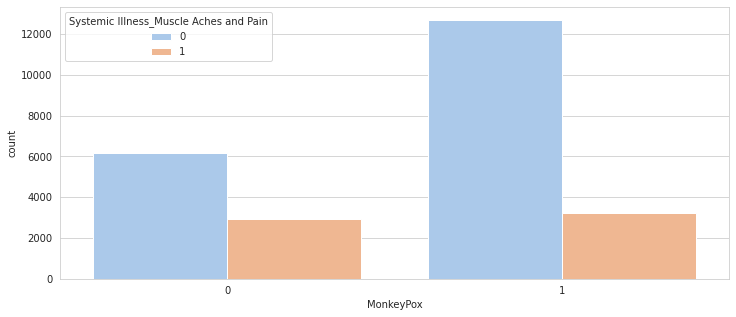

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x='MonkeyPox',hue='Systemic Illness_Muscle Aches and Pain',data=df, palette='pastel')

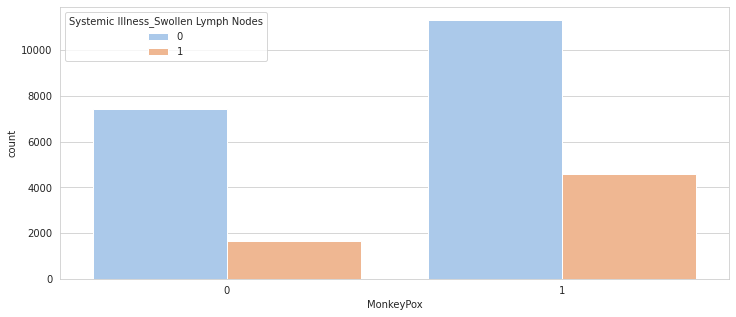

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='MonkeyPox',hue='Systemic Illness_Swollen Lymph Nodes',data=df, palette='pastel')

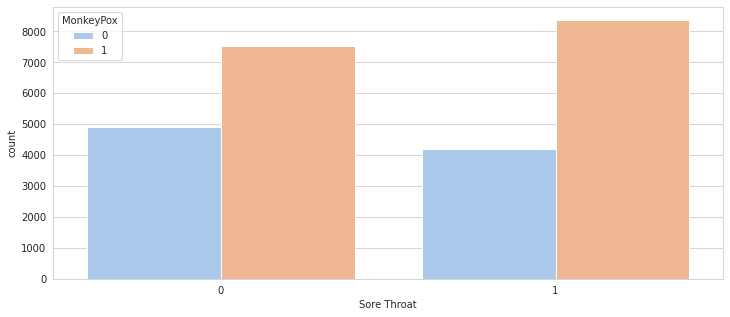

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Sore Throat',hue='MonkeyPox',data=df, palette='pastel')

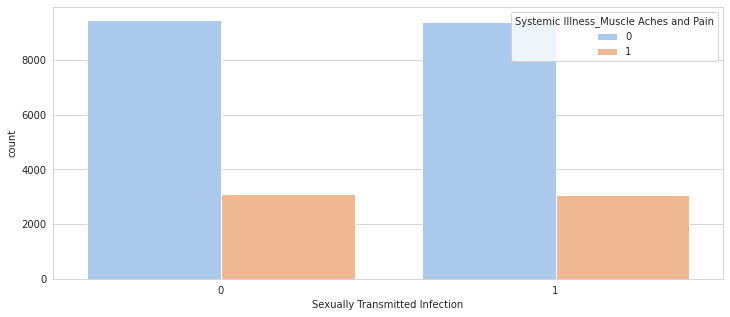

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Sexually Transmitted Infection',hue='Systemic Illness_Muscle Aches and Pain',data=df, palette='pastel')

# **Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('MonkeyPox', axis=1)
y= df['MonkeyPox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
df.dtypes

Rectal Pain                               int64
Sore Throat                               int64
Penile Oedema                             int64
Oral Lesions                              int64
Solitary Lesion                           int64
Swollen Tonsils                           int64
HIV Infection                             int64
Sexually Transmitted Infection            int64
MonkeyPox                                 int64
Systemic Illness_Muscle Aches and Pain    uint8
Systemic Illness_None                     uint8
Systemic Illness_Swollen Lymph Nodes      uint8
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 101)
mutual_info


array([0.01642093, 0.        , 0.        , 0.00215182, 0.        ,
       0.00339663, 0.01084675, 0.00737749, 0.00441146, 0.0033591 ,
       0.00648629])

In [ ]:
print(len(mutual_info))
print(X_train.shape)

11
(20000, 11)


In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Rectal Pain                               0.016421
HIV Infection                             0.010847
Sexually Transmitted Infection            0.007377
Systemic Illness_Swollen Lymph Nodes      0.006486
Systemic Illness_Muscle Aches and Pain    0.004411
Swollen Tonsils                           0.003397
Systemic Illness_None                     0.003359
Oral Lesions                              0.002152
Sore Throat                               0.000000
Penile Oedema                             0.000000
Solitary Lesion                           0.000000
dtype: float64

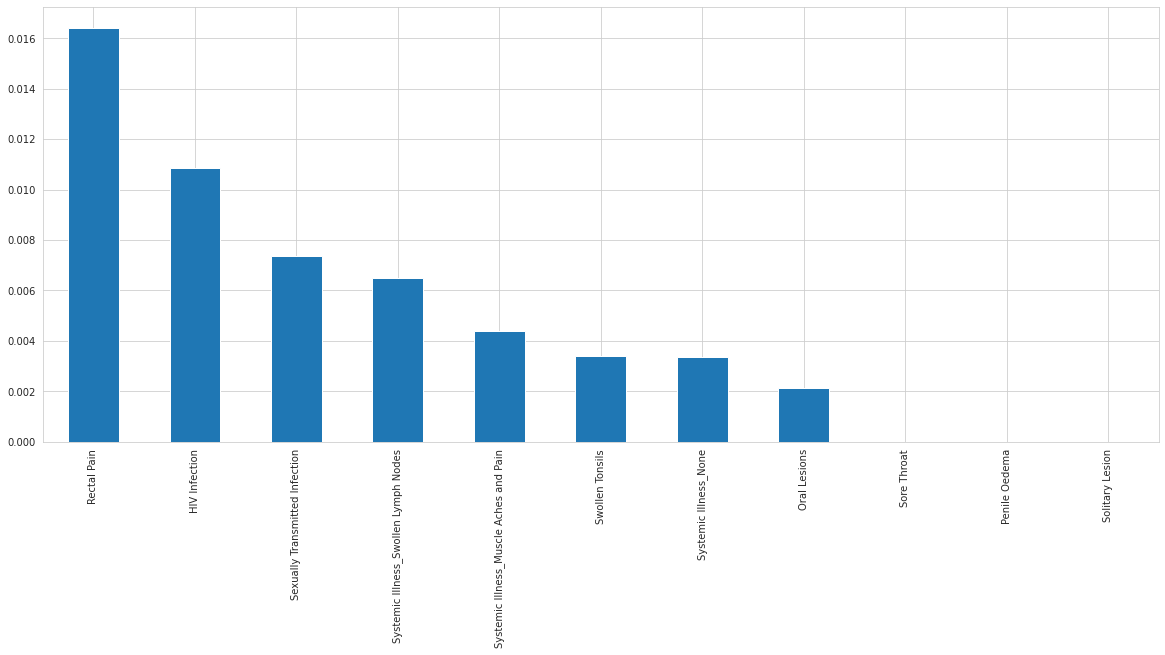

In [ ]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=8)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Swollen Tonsils',
       'HIV Infection', 'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_None', 'Systemic Illness_Swollen Lymph Nodes'],
      dtype='object')

In [ ]:
df= df.drop(['Solitary Lesion', 'Oral Lesions', 'Sore Throat'], axis=1)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

In [ ]:
params =  {
    'min_samples_leaf': range(15,35),
    'max_depth': range(10,25),
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [ ]:
DT_grid = GridSearchCV(estimator=dtree,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=3)

In [ ]:
DT_grid.fit(X_train, y_train)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.674 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.688 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.682 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9

[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.668 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.682 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=23;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samp

[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_sampl

[CV 3/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV 4/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV 3/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.674 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.688 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.682 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=15;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=23;, score=0.682 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=23;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=23;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=24;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=24;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=24;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=log2, min_samp

[CV 1/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=log2, min_sampl

[CV 6/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=auto, min_samp

[CV 7/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=26;, score=0.688 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=27;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.649 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=15;, score=0.678 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samp

[CV 3/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samp

[CV 6/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=31;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=31;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=sqrt, min_samp

[CV 1/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=log2, min_sampl

[CV 3/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.688 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=log2, min_samp

[CV 5/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=33;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=log2, min_samp

[CV 1/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=auto, min_sampl

[CV 6/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=auto, min_samp

[CV 10/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samp

[CV 2/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samp

[CV 7/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=32;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samp

[CV 8/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=log2, min_samp

[CV 4/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=auto, min_samp

[CV 5/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=auto, min_samp

[CV 4/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=auto, min_samp

[CV 5/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samp

[CV 3/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.676 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=sqrt, min_samp

[CV 1/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=log2, min_sampl

[CV 5/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=25;, score=0.673 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=26;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=26;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=log2, min_samp

[CV 3/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=auto, min_samp

[CV 6/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=auto, min_samp

[CV 4/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=auto, min_samp

[CV 1/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=sqrt, min_sampl

[CV 10/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samp

[CV 5/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=log2, min_samp

[CV 6/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=log2, min_samp

[CV 3/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=log2, min_samp

[CV 1/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=auto, min_sampl

[CV 5/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=auto, min_samp

[CV 3/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samp

[CV 7/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=24;, score=0.670 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samp

[CV 2/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=sqrt, min_samp

[CV 9/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=log2, min_samp

[CV 4/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=log2, min_samp

[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samp

[CV 3/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=auto, min_samp

[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samp

[CV 7/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samp

[CV 2/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samp

[CV 5/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=log2, min_samp

[CV 9/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=log2, min_samp

[CV 10/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.676 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=17;, score=0.663 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=18;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=18;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=auto, min_samp

[CV 3/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.688 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=auto, min_samp

[CV 7/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=33;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=auto, min_samp

[CV 10/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samp

[CV 1/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.676 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=sqrt, min_sampl

[CV 2/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=24;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=log2, min_samp

[CV 1/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=log2, min_sampl

[CV 5/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=auto, min_samp

[CV 1/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=sqrt, min_sampl

[CV 3/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samp

[CV 1/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=sqrt, min_sampl

[CV 5/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=log2, min_samp

[CV 10/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=log2, min_samp

[CV 6/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=auto, min_samp

[CV 7/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.688 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=auto, min_samp

[CV 10/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samp

[CV 9/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=24;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samp

[CV 9/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=33;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=sqrt, min_samp

[CV 10/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=19, max_features=log2, min_samp

[CV 6/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=log2, min_samp

[CV 10/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=16;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=auto, min_samp

[CV 1/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=auto, min_sampl

[CV 2/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samp

[CV 2/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.688 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samp

[CV 6/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=log2, min_samp

[CV 9/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.676 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=log2, min_samp

[CV 4/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.681 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=auto, min_samp

[CV 10/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=auto, min_samp

[CV 5/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=32;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=auto, min_samp

[CV 7/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samp

[CV 3/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=sqrt, min_samp

[CV 9/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=log2, min_samp

[CV 2/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=24;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=21, max_features=log2, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=21, max_features=log2, min_samp

[CV 8/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=25;, score=0.673 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=auto, min_samp

[CV 5/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=auto, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samp

[CV 2/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samp

[CV 4/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=sqrt, min_samp

[CV 1/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=log2, min_sampl

[CV 4/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=log2, min_samp

[CV 7/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=auto, min_samp

[CV 1/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=auto, min_sampl

[CV 4/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=31;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=auto, min_samp

[CV 2/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samp

[CV 6/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samp

[CV 8/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=sqrt, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=log2, min_samp

[CV 6/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=24;, score=0.670 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=log2, min_samp

[CV 2/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=log2, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=23, max_features=log2, min_samp

[CV 1/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=auto, min_sampl

[CV 6/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=auto, min_samp

[CV 9/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samp

[CV 10/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samp

[CV 7/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=sqrt, min_samp

[CV 9/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=log2, min_samp

[CV 5/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=29;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=log2, min_samp

[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=15;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.684 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=16;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, 

[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.682 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=24;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=25;, score=0.677 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, 

[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, 

[CV 6/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=18;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=18;, score=0.688 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=18;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=18;, score=0.670 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=19;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=19;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=19;, score=0.675 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, 

[CV 10/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.681 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, 

[CV 10/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, 

[CV 3/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=21;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, 

[CV 5/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=29;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, 

[CV 1/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.670 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, m

[CV 2/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, 

[CV 8/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, 

[CV 9/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=20;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, 

[CV 1/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, m

[CV 4/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.678 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.675 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=16;, score=0.657 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, 

[CV 9/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.670 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, 

[CV 10/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.679 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, 

[CV 2/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, 

[CV 1/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, m

[CV 7/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, 

[CV 7/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, 

[CV 9/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, 

[CV 5/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, 

[CV 5/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, 

[CV 6/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, 

[CV 10/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=17;, score=0.663 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=18;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, 

[CV 5/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, 

[CV 5/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, 

[CV 6/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, 

[CV 6/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=28;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, 

[CV 8/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, 

[CV 8/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, 

[CV 10/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, 

[CV 1/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, m

[CV 2/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, 

[CV 8/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, 

[CV 8/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, 

[CV 9/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, 

[CV 1/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, m

[CV 2/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, 

[CV 2/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.676 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=14, 

[CV 2/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, 

[CV 4/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, 

[CV 10/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, 

[CV 9/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, 

[CV 10/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, 

[CV 2/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, 

[CV 2/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, 

[CV 8/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=31;, score=0.679 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=31;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, 

[CV 2/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, 

[CV 5/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, 

[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, 

[CV 2/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, 

[CV 7/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, 

[CV 1/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, m

[CV 6/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=27;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=28;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, 

[CV 8/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=15;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, 

[CV 10/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, 

[CV 4/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=31;, score=0.679 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, 

[CV 5/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=17;, score=0.663 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=18;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, 

[CV 4/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=25;, score=0.684 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, 

[CV 8/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, 

[CV 7/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=18;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, 

[CV 2/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, 

[CV 4/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, 

[CV 6/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, 

[CV 6/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=29;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, 

[CV 8/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=18, 

[CV 7/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=23;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=24;, score=0.670 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=18, 

[CV 9/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.679 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, 

[CV 4/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, 

[CV 4/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, 

[CV 6/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, 

[CV 7/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=22;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, 

[CV 7/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=29;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, 

[CV 8/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=16;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, 

[CV 10/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=23;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, 

[CV 7/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=sqrt, min_samples_leaf=32;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, 

[CV 8/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=18;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=19;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=19;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, 

[CV 10/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, 

[CV 3/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, 

[CV 3/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, 

[CV 6/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=29;, score=0.690 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=29;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=29;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, 

[CV 9/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=16;, score=0.674 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, 

[CV 3/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=25;, score=0.673 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, 

[CV 7/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, 

[CV 10/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=20;, score=0.664 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.663 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, 

[CV 5/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=29;, score=0.683 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, 

[CV 7/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, 

[CV 2/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, 

[CV 2/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, 

[CV 1/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, m

[CV 1/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.684 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.671 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=26;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, m

[CV 3/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, max_features=sqrt, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=21, 

[CV 3/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.675 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=21;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=21, 

[CV 4/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=21, max_features=log2, min_samples_leaf=29;, score=0.668 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=21, 

[CV 7/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=16;, score=0.661 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=16;, score=0.671 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, 

[CV 7/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, 

[CV 10/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=29;, score=0.666 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, 

[CV 10/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=16;, score=0.665 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.661 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, 

[CV 3/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.683 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=24;, score=0.679 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, 

[CV 6/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.687 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.697 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=31;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=32;, score=0.678 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=sqrt, min_samples_leaf=32;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, 

[CV 10/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=20;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, 

[CV 2/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.683 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.685 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=27;, score=0.682 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, 

[CV 6/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.684 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.686 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=22, max_features=log2, min_samples_leaf=34;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.660 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.681 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=15;, score=0.668 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, 

[CV 9/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.681 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.683 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=23;, score=0.674 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, 

[CV 2/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.686 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.665 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.681 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.685 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, 

[CV 3/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.656 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=17;, score=0.663 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, 

[CV 4/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=25;, score=0.673 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=26;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, 

[CV 6/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=sqrt, min_samples_leaf=33;, score=0.658 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, 

[CV 9/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.672 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.682 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=20;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, 

[CV 2/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.677 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.685 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.684 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.680 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=28;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, 

[CV 5/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.670 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.677 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.680 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=15;, score=0.662 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=16;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=16;, score=0.676 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, 

[CV 6/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=22;, score=0.688 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=22;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=22;, score=0.689 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=22;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=23;, score=0.664 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=23;, score=0.688 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=23;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, 

[CV 8/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=30;, score=0.683 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=30;, score=0.669 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=31;, score=0.679 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=31;, score=0.682 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=31;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=31;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=31;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, 

[CV 1/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.671 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.666 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.668 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.675 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=18;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, m

[CV 3/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.679 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.689 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.680 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.681 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=25;, score=0.673 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, 

[CV 5/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.669 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.677 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.689 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.690 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=32;, score=0.672 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=33;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_leaf=33;, score=0.685 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, 

[CV 4/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.680 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.672 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.679 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.683 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.678 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.685 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=19;, score=0.671 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=20;, score=0.662 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, 

[CV 6/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=26;, score=0.676 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=26;, score=0.686 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=26;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=26;, score=0.692 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=26;, score=0.661 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=27;, score=0.666 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=27;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=27;, score=0.669 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, 

[CV 8/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=33;, score=0.682 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=33;, score=0.687 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=33;, score=0.674 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=34;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=34;, score=0.671 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=34;, score=0.689 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=log2, min_samples_leaf=34;, score=0.674 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 25),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(15, 35)},
             verbose=3)

In [ ]:
DT_grid.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 24}

In [ ]:
dtree= DecisionTreeClassifier(criterion='gini',
 max_depth=11,
 max_features='auto',
 min_samples_leaf=24)

In [ ]:
dtree.fit(X_train,y_train)
prediction=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,prediction))
print("Train Accuracy: ", accuracy_score(y_train, dtree.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.62      0.32      0.42      1818
           1       0.69      0.89      0.78      3182

    accuracy                           0.68      5000
   macro avg       0.66      0.60      0.60      5000
weighted avg       0.67      0.68      0.65      5000

Train Accuracy:  0.69845
Test Accuracy:  0.6802


In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)

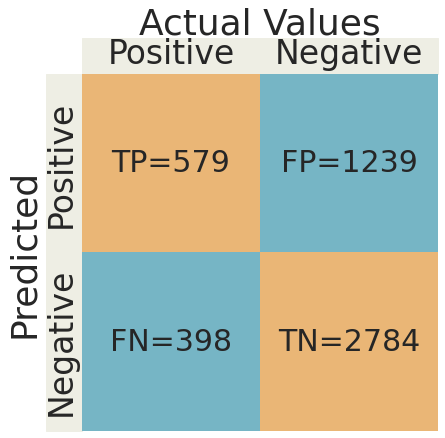

In [ ]:
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state = 42)

In [ ]:
params =  {
    'n_estimators' : range(30,50),
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'max_depth': range(7,14),
    'max_features' : ['sqrt', 'log2']
   
}

In [ ]:
rfc_grid = GridSearchCV(estimator=rfc,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=3)

In [ ]:
rfc_grid.fit(X_train, y_train)

Fitting 10 folds for each of 1400 candidates, totalling 14000 fits
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.691 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.701 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.680 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.693 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.689 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.702 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.694 total time=   0.1s
[CV 9/10] END

[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.700 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.682 total time=   0.4s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.691 total time=   0.3s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.688 total time=   0.4s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.697 total time=   0.3s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.702 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.697 total time=   0.4s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=37;, score=0.699 total time=   0.6s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.699 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.697 total time=   0.3s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.700 total time=   0.3s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=44;, score=0.678 total time=   0.3s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=45;, score=0.690 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=31;, score=0.704 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=31;, score=0.696 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=31;, score=0.697 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=31;, score=0.678 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=32;, score=0.693 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=32;, score=0.701 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=32;, score=0.679 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=32;, score=0.690 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=38;, score=0.699 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=38;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.690 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.700 total time=   0.4s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.689 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.688 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=39;, score=0.697 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.690 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.701 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.680 total time=   0.3s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.701 total time=   0.7s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=46;, score=0.694 total time=   0.3s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=4

[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.688 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.690 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.704 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.697 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.697 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=33;, score=0.678 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.692 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=40;, score=0.696 total time=   0.3s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=40;, score=0.701 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=40;, score=0.694 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=40;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=40;, score=0.677 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.693 total time=   0.3s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.681 total time=   0.6s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=47;, score=0.695 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=47;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=47;, score=0.677 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.691 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.699 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.693 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.699 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.680 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.692 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.688 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.697 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.702 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.697 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=3

[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.689 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.687 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.701 total time=   0.3s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.694 total time=   0.3s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.678 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.695 total time=   0.3s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.703 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.696 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.698 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.678 total time=   0.3s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.691 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.701 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=36;, score=0.703 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=36;, score=0.694 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=36;, score=0.700 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=36;, score=0.678 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.690 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.682 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.691 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=43;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=43;, score=0.679 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.690 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.695 total time=   0.3s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.702 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.680 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.690 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.688 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.698 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.704 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.696 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.697 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.691 total time=   0.3s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.688 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.697 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.702 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.696 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.699 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.690 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.694 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.702 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.694 total time=   0.3s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.699 total time=   0.3s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.678 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.690 total time=   0.4s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.701 total time=   0.4s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.680 total time=   0.3s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.697 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.697 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.692 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.701 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.682 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.688 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.690 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.678 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.691 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.689 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.688 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.701 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.699 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.703 total time=   0.2s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.695 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.690 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.702 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.696 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.695 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.693 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.699 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.701 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.695 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.698 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.677 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.693 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.681 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.689 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.695 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.677 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.691 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.687 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.692 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.700 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.681 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.690 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.691 total time=   0.1s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.697 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.703 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.694 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=3

[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.681 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.688 total time=   0.1s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.700 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.696 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.701 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.679 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.696 total time=   0.1s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.702 total time=   0.1s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.694 total time=   0.1s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.696 total time=   0.1s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.692 total time=   0.1s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.702 total time=   0.1s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.680 total time=   0.1s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.697 total time=   0.2s
[CV 9/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.699 total time=   0.2s
[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.679 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.692 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.700 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.681 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.691 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.688 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 10/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.678 total time=   0.2s
[CV 1/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.690 total time=   0.2s
[CV 2/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.701 total time=   0.2s
[CV 3/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.688 total time=   0.2s
[CV 5/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.694 total time=   0.2s
[CV 7/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.702 total time=   0.3s
[CV 8/10] END max_depth=7, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.691 total time=   0.1s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.678 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.693 total time=   0.1s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.694 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.694 total time=   0.1s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.709 total time=   0.1s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.689 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.697 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.691 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.694 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.684 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.709 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.686 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.684 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.694 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.679 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.698 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.687 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.695 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.678 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.693 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.695 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.675 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.685 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.693 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.677 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.690 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.692 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.694 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.707 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.694 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.677 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.690 total time=   0.3s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.693 total time=   0.3s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.695 total time=   0.3s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.708 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.687 total time=   0.3s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.701 total time=   0.4s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.693 total time=   0.1s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.695 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.692 total time=   0.1s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.708 total time=   0.1s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.690 total time=   0.1s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.699 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.677 total time=   0.1s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.686 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.688 total time=   0.3s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.684 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.693 total time=   0.4s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.677 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.677 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.686 total time=   0.1s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.692 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.694 total time=   0.1s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.694 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.685 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.694 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.677 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.692 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.694 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.691 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.694 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.678 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.690 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.692 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.707 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.691 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.693 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.695 total time=   0.1s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.709 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.686 total time=   0.1s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.698 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.675 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.686 total time=   0.1s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.691 total time=   0.3s
[CV 7/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.701 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.685 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.695 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.678 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 8/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.689 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.702 total time=   0.3s
[CV 10/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.677 total time=   0.3s
[CV 1/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.684 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.694 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.677 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.690 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.692 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.676 total time=   0.1s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.685 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.691 total time=   0.1s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.677 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.694 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.694 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.692 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.709 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.694 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.678 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.690 total time=   0.3s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.695 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.707 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.690 total time=   0.3s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.693 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.701 total time=   0.3s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.677 total time=   0.3s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.683 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.692 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.709 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.689 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.699 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.686 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.692 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.675 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.684 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.692 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.677 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.690 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.693 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.675 total time=   0.3s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.682 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.693 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.689 total time=   0.3s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.693 total time=   0.3s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.695 total time=   0.3s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.708 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.695 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.680 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.692 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.694 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.708 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.690 total time=   0.3s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.699 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.690 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.692 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.694 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.689 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.700 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.684 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.695 total time=   0.3s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.688 total time=   0.1s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.698 total time=   0.2s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.686 total time=   0.1s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.692 total time=   0.2s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.678 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.688 total time=   0.1s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.700 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.676 total time=   0.1s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.684 total time=   0.1s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.693 total time=   0.1s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.678 total time=   0.1s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.691 total time=   0.1s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.694 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.677 total time=   0.4s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.684 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.693 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.677 total time=   0.3s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.690 total time=   0.4s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.692 total time=   0.3s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.695 total time=   0.4s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.708 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.691 total time=   0.1s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.678 total time=   0.1s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.693 total time=   0.1s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.694 total time=   0.1s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.694 total time=   0.1s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.709 total time=   0.1s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.689 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.697 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.691 total time=   0.2s
[CV 5/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.694 total time=   0.2s
[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.693 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.708 total time=   0.2s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.688 total time=   0.2s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.701 total time=   0.1s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.676 total time=   0.1s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.684 total time=   0.2s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 6/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.695 total time=   0.2s
[CV 7/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.709 total time=   0.3s
[CV 8/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.686 total time=   0.3s
[CV 9/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.701 total time=   0.3s
[CV 10/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.676 total time=   0.3s
[CV 1/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.684 total time=   0.3s
[CV 2/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.694 total time=   0.3s
[CV 3/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.679 total time=   0.2s
[CV 4/10] END max_depth=8, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.692 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.671 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.676 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.689 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.672 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.677 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.673 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.679 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.688 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.672 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.684 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.700 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.687 total time=   0.3s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.675 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.680 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.682 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.700 total time=   0.3s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.685 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.697 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=1, n_estimators=

[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.685 total time=   0.1s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.684 total time=   0.1s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.700 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.693 total time=   0.1s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.674 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.678 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.683 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.702 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.699 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.673 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.679 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.689 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.673 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.697 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.672 total time=   0.3s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.678 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.689 total time=   0.1s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.673 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.676 total time=   0.1s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.685 total time=   0.1s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.679 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.691 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.673 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.678 total time=   0.1s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.683 total time=   0.1s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.701 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.689 total time=   0.3s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.674 total time=   0.3s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.680 total time=   0.3s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.684 total time=   0.3s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.683 total time=   0.4s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.699 total time=   0.7s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.698 total time=   0.4s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=3, n_estimators=

[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.685 total time=   0.1s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.688 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.699 total time=   0.1s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.682 total time=   0.1s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.693 total time=   0.1s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.670 total time=   0.1s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.679 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.689 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.701 total time=   0.1s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.684 total time=   0.3s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.697 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.672 total time=   0.3s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.679 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.688 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.672 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.697 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.678 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.689 total time=   0.3s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.675 total time=   0.3s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.679 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.683 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=

[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.679 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.689 total time=   0.1s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.674 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.677 total time=   0.1s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.688 total time=   0.1s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.691 total time=   0.1s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.701 total time=   0.1s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.681 total time=   0.1s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=3

[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.675 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.679 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.685 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.701 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.681 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.697 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.676 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 5/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.682 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.685 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.702 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.695 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.674 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.680 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.690 total time=   0.4s
[CV 3/10] END max_depth=9, max_features=sqrt, min_samples_leaf=7, n_estimators=

[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.700 total time=   0.1s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.684 total time=   0.1s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.693 total time=   0.1s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.674 total time=   0.1s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.676 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.690 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.673 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.698 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.680 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.689 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.673 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.683 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=

[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.678 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.688 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.673 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.681 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.682 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.682 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.700 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=1, n_estimators=4

[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.673 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.678 total time=   0.1s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.684 total time=   0.1s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.684 total time=   0.1s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.700 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.684 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.694 total time=   0.1s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.672 total time=   0.1s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.684 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.699 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.684 total time=   0.3s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.699 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=44;, score=0.680 total time=   0.4s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=44;, score=0.689 total time=   0.7s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=2, n_estimators=

[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.697 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.694 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.671 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=31;, score=0.678 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=31;, score=0.690 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=31;, score=0.671 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=31;, score=0.676 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.694 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.679 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.688 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.671 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.684 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=

[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.681 total time=   0.3s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.688 total time=   0.4s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.674 total time=   0.3s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.679 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.682 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.701 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.684 total time=   0.5s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=3, n_estimators=4

[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.672 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.677 total time=   0.1s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.686 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.687 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.699 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.693 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.670 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.685 total time=   0.2s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.700 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.697 total time=   0.2s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.673 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=40;, score=0.679 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=40;, score=0.690 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.700 total time=   0.3s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.683 total time=   0.2s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.697 total time=   0.3s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.672 total time=   0.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=47;, score=0.678 total time=   0.3s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=47;, score=0.688 total time=   0.3s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=47;, score=0.675 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=47;, score=0.679 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=5, n_estimators=

[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.697 total time=   0.1s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.672 total time=   0.1s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.679 total time=   0.1s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.690 total time=   0.1s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.675 total time=   0.1s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.678 total time=   0.2s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=34;, score=0.690 total time=   0.1s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.680 total time=   0.2s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.691 total time=   0.2s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.676 total time=   0.2s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.679 total time=   0.3s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.685 total time=   0.2s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.686 total time=   0.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.701 total time=   0.2s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=41;, score=0.683 total time=   0.3s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=4

[CV 3/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.676 total time=   0.3s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.680 total time=   0.6s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.682 total time=   0.5s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.684 total time=   0.7s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.702 total time=   0.5s
[CV 8/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.683 total time=   0.5s
[CV 9/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.694 total time=   0.4s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=48;, score=0.673 total time=   0.3s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_leaf=7, n_estimators=

[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.678 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.679 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.688 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.679 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.692 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=35;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=36;, score=0.667 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_es

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.680 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.674 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.689 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.677 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.692 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=42;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=43;, score=0.666 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=43;, score=0.684 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_es

[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.675 total time=   0.4s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.687 total time=   0.4s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.681 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.692 total time=   0.4s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.667 total time=   0.4s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.665 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.683 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_es

[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.690 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.680 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.691 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=37;, score=0.668 total time=   0.5s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=37;, score=0.682 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=37;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=37;, score=0.677 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_es

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.678 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.694 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=44;, score=0.667 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=44;, score=0.686 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=44;, score=0.670 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=44;, score=0.675 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=44;, score=0.679 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_es

[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.693 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.666 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.680 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.674 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.683 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=31;, score=0.676 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_es

[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.665 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.682 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.670 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.684 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.676 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=38;, score=0.691 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_es

[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.664 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.680 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.669 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.674 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.683 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.676 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.690 total time=   0.5s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=45;, score=0.679 total time=   0.4s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_est

[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.683 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.673 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.676 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.678 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.690 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.680 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=32;, score=0.691 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_es

[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.679 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.677 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.689 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.674 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.696 total time=   0.4s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=39;, score=0.671 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_es

[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.675 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.679 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.675 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.690 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.678 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.693 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=46;, score=0.668 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=47;, score=0.665 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, n_es

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.679 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.680 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.689 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.678 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.692 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=33;, score=0.671 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=34;, score=0.668 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=34;, score=0.684 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_es

[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.678 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.689 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.676 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.694 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=41;, score=0.669 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=41;, score=0.683 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=41;, score=0.671 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_es

[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.691 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.677 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.694 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.668 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.667 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.682 total time=   0.4s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.670 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_estimators=48;, score=0.678 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=7, n_es

[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.678 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.691 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.669 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.664 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.681 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=35;, score=0.678 total time=   0.1s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_es

[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.693 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.668 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.666 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.684 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.672 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.680 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=42;, score=0.674 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_es

[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.663 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.684 total time=   0.4s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.671 total time=   0.4s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.674 total time=   0.4s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.677 total time=   0.4s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.675 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=49;, score=0.687 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=1, n_es

[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.667 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.682 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.678 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.677 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.690 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=36;, score=0.680 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_est

[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.685 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.677 total time=   0.5s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.680 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.677 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.689 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.678 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=43;, score=0.694 total time=   0.3s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=2, n_es

[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.674 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.683 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.678 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.691 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.677 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.693 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=30;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_es

[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.673 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.682 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.677 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.689 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.680 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.693 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=37;, score=0.669 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=38;, score=0.665 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_es

[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.684 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.675 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.691 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.680 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.695 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=44;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.664 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_estimators=45;, score=0.680 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=3, n_es

[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.678 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.688 total time=   0.1s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.680 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.690 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.669 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.667 total time=   0.1s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.683 total time=   0.1s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=32;, score=0.667 total time=   0.1s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_es

[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.689 total time=   0.2s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.676 total time=   0.2s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.693 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.670 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.668 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.683 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=39;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_es

[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.680 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.693 total time=   0.4s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.670 total time=   0.4s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.665 total time=   0.4s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.683 total time=   0.4s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.675 total time=   0.4s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=46;, score=0.679 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=5, n_es

[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.692 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.671 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.667 total time=   0.2s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.683 total time=   0.2s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.675 total time=   0.2s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.679 total time=   0.2s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=33;, score=0.680 total time=   0.2s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_es

[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.668 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.683 total time=   0.4s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.670 total time=   0.3s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.679 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.682 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.678 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=40;, score=0.689 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_es

[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.667 total time=   0.3s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.681 total time=   0.3s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.670 total time=   0.4s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.679 total time=   0.3s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.681 total time=   0.3s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.677 total time=   0.3s
[CV 7/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.691 total time=   0.3s
[CV 8/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_estimators=47;, score=0.677 total time=   0.3s
[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=7, n_est

[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.670 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=34;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_es

[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.672 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.665 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.677 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.667 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=41;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_es

[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.671 total time=   0.4s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.663 total time=   0.4s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.668 total time=   0.6s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=48;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_estimators=49;, score=0.658 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=1, n_es

[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.671 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.685 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=35;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=36;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_es

[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.664 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.676 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.670 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.661 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=43;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_es

[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.669 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.668 total time=   0.5s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=30;, score=0.669 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_es

[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.670 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.668 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=37;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_es

[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.671 total time=   0.4s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_estimators=44;, score=0.664 total time=   0.4s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=3, n_es

[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.661 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.669 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=31;, score=0.679 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_es

[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.668 total time=   0.4s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.677 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=38;, score=0.668 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_est

[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.664 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.664 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=45;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=5, n_es

[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.668 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.671 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.682 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.675 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.687 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=32;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_es

[CV 4/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.672 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.671 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.684 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.673 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.686 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=39;, score=0.669 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=40;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_es

[CV 5/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.673 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.668 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.685 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.673 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.685 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=46;, score=0.671 total time=   0.4s
[CV 1/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.663 total time=   0.4s
[CV 2/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_estimators=47;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=sqrt, min_samples_leaf=7, n_es

[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.667 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.684 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=34;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_es

[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.678 total time=   0.4s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.682 total time=   0.5s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.667 total time=   0.5s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.660 total time=   0.7s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.677 total time=   0.8s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.667 total time=   1.0s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=41;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_es

[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.666 total time=   0.4s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.669 total time=   0.4s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.657 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_estimators=48;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=1, n_es

[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.683 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.658 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=35;, score=0.668 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_es

[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.668 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.664 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=42;, score=0.676 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_es

[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.658 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.664 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_estimators=49;, score=0.669 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=2, n_est

[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.666 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.669 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.670 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=36;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_es

[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.666 total time=   0.3s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.665 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.676 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.666 total time=   0.4s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_estimators=43;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=3, n_es

[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.670 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.668 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.676 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.669 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=30;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=31;, score=0.661 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_es

[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.669 total time=   0.3s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.668 total time=   0.8s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.687 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=37;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=38;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_es

[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.666 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.669 total time=   0.3s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.682 total time=   0.3s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.660 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_estimators=45;, score=0.664 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=5, n_es

[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.681 total time=   0.2s
[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.676 total time=   0.1s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.688 total time=   0.1s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.662 total time=   0.1s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.678 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.668 total time=   0.1s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=32;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_es

[CV 8/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.672 total time=   0.2s
[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.686 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.667 total time=   0.4s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=39;, score=0.672 total time=   0.2s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_es

[CV 9/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.685 total time=   0.2s
[CV 10/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.671 total time=   0.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.663 total time=   0.3s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.669 total time=   0.2s
[CV 5/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.673 total time=   0.3s
[CV 6/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_estimators=46;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=11, max_features=log2, min_samples_leaf=7, n_es

[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.666 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.667 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=33;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_es

[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.671 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.666 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=0.666 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_est

[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.663 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.678 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_estimators=47;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=1, n_es

[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.670 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.683 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=34;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_es

[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.665 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.677 total time=   0.5s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.667 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.682 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=41;, score=0.668 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=42;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_es

[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.663 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=48;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.658 total time=   0.4s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_estimators=49;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=2, n_es

[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.670 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.683 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=36;, score=0.669 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_es

[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.676 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.661 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=43;, score=0.666 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_es

[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.681 total time=   0.4s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.669 total time=   0.4s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.678 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.670 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=30;, score=0.668 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_es

[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.684 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.669 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.661 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.678 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.668 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=37;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_es

[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.666 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=5, n_es

[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.665 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.674 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.684 total time=   0.1s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=31;, score=0.674 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_est

[CV 2/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.672 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.685 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.672 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=38;, score=0.689 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_es

[CV 3/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.675 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.688 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.672 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.687 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_estimators=45;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=sqrt, min_samples_leaf=7, n_es

[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.671 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.667 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.669 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=32;, score=0.666 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=33;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_es

[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.666 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.681 total time=   0.4s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=39;, score=0.666 total time=   0.4s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.659 total time=   0.4s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=40;, score=0.677 total time=   0.4s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_es

[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.662 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.676 total time=   0.4s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.665 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.659 total time=   0.4s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.676 total time=   0.5s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_estimators=47;, score=0.666 total time=   0.4s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=1, n_es

[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.668 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.684 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=34;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_es

[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.682 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.660 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=41;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_es

[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.682 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.657 total time=   0.4s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.676 total time=   0.4s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.671 total time=   0.4s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_estimators=48;, score=0.663 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=2, n_es

[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.658 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.677 total time=   0.4s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.669 total time=   0.6s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.668 total time=   0.5s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=35;, score=0.680 total time=   0.5s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_es

[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.676 total time=   0.4s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.667 total time=   0.4s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.664 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.676 total time=   0.5s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=42;, score=0.666 total time=   0.4s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_est

[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.677 total time=   0.4s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.665 total time=   0.4s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.668 total time=   0.5s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.670 total time=   0.5s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.664 total time=   0.3s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.668 total time=   0.4s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_estimators=49;, score=0.681 total time=   0.4s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=3, n_es

[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.679 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.671 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.684 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=36;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_es

[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.671 total time=   0.4s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.666 total time=   0.4s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.667 total time=   0.4s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=43;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=44;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=5, n_es

[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.674 total time=   0.3s
[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.683 total time=   0.2s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.674 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.686 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=30;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=31;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_es

[CV 6/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.685 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.671 total time=   0.2s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.689 total time=   0.2s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=38;, score=0.667 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_es

[CV 7/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.686 total time=   0.3s
[CV 8/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.672 total time=   0.3s
[CV 9/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.689 total time=   0.3s
[CV 10/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.678 total time=   0.3s
[CV 3/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_estimators=45;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=12, max_features=log2, min_samples_leaf=7, n_es

[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=31;, score=0.669 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=31;, score=0.681 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=31;, score=0.666 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=32;, score=0.671 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_es

[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=38;, score=0.683 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=38;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.659 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=39;, score=0.666 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_es

[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=45;, score=0.669 total time=   0.4s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.657 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.662 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_estimators=46;, score=0.676 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=1, n_es

[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.667 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.668 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.667 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.680 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=33;, score=0.668 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_est

[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.671 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=40;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_es

[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.663 total time=   0.4s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.678 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.666 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.682 total time=   0.5s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_estimators=47;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=2, n_es

[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.680 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.669 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.681 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=34;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=35;, score=0.658 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_es

[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.665 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.677 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.667 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.682 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=41;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=42;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_es

[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.663 total time=   0.4s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=48;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.658 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_estimators=49;, score=0.665 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=3, n_es

[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.681 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.670 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.685 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=35;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.660 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.678 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.670 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=36;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_es

[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.667 total time=   0.4s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.682 total time=   0.4s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=42;, score=0.670 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.663 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.664 total time=   0.4s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=43;, score=0.671 total time=   0.4s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_es

[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.683 total time=   0.5s
[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=5, n_estimators=49;, score=0.668 total time=   0.4s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.676 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.669 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.674 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=30;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_es

[CV 10/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=36;, score=0.666 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.675 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.668 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.668 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=37;, score=0.685 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_es

[CV 1/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.662 total time=   0.4s
[CV 2/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.678 total time=   0.4s
[CV 3/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.666 total time=   0.4s
[CV 4/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.674 total time=   0.4s
[CV 6/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.669 total time=   0.4s
[CV 7/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.686 total time=   0.4s
[CV 8/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_estimators=44;, score=0.672 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=sqrt, min_samples_leaf=7, n_est

[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.677 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.669 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=31;, score=0.681 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_es

[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.670 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.666 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.678 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.669 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.683 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=38;, score=0.668 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_es

[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.667 total time=   0.4s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.672 total time=   0.4s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.662 total time=   0.4s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.677 total time=   0.4s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.667 total time=   0.4s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.681 total time=   0.4s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=45;, score=0.669 total time=   0.4s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_estimators=46;, score=0.657 total time=   0.5s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=1, n_es

[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.667 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.678 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.669 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.683 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=32;, score=0.666 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.659 total time=   0.5s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=33;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_es

[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.666 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.668 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.681 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=39;, score=0.666 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=40;, score=0.666 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_es

[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=46;, score=0.676 total time=   0.4s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=46;, score=0.665 total time=   0.4s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=46;, score=0.681 total time=   0.4s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=46;, score=0.669 total time=   0.4s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.659 total time=   0.4s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.676 total time=   0.4s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.666 total time=   0.4s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_estimators=47;, score=0.667 total time=   0.4s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=2, n_es

[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=33;, score=0.667 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=33;, score=0.683 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=33;, score=0.667 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.659 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.667 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=34;, score=0.669 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_es

[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=40;, score=0.682 total time=   0.4s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=40;, score=0.667 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.660 total time=   0.4s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.667 total time=   0.4s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.667 total time=   0.4s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.672 total time=   0.4s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=41;, score=0.665 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_es

[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=47;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.657 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.676 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.671 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.663 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_estimators=48;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=3, n_es

[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.660 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.678 total time=   0.2s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.668 total time=   0.2s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.667 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.668 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.669 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.681 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=35;, score=0.670 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_est

[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.677 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.666 total time=   0.3s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.668 total time=   0.3s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.672 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.667 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.677 total time=   0.3s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.667 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=42;, score=0.682 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_es

[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.665 total time=   0.4s
[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.668 total time=   0.6s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.670 total time=   0.4s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.665 total time=   0.4s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.677 total time=   1.2s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.670 total time=   0.5s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.683 total time=   0.4s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=5, n_estimators=49;, score=0.668 total time=   0.4s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_es

[CV 4/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.666 total time=   0.2s
[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.670 total time=   0.2s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.668 total time=   0.2s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.684 total time=   0.2s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.673 total time=   0.2s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.687 total time=   0.2s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=36;, score=0.666 total time=   0.2s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=37;, score=0.662 total time=   0.2s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_es

[CV 5/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.674 total time=   0.3s
[CV 6/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.669 total time=   0.3s
[CV 7/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.687 total time=   0.4s
[CV 8/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.671 total time=   0.3s
[CV 9/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.688 total time=   0.3s
[CV 10/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=43;, score=0.669 total time=   0.3s
[CV 1/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.662 total time=   0.3s
[CV 2/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_estimators=44;, score=0.678 total time=   0.3s
[CV 3/10] END max_depth=13, max_features=log2, min_samples_leaf=7, n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(7, 14),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'n_estimators': range(30, 50)},
             verbose=3)

In [ ]:
rfc_grid.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 32}

In [ ]:
rfc = RandomForestClassifier(  max_depth= 7,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 32
)

In [ ]:
rfc.fit(X_train,y_train)
prediction=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,prediction))
print("Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.28      0.40      1818
           1       0.69      0.93      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.69      0.60      0.59      5000
weighted avg       0.69      0.69      0.65      5000

Train Accuracy:  0.69695
Test Accuracy:  0.6908


In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)

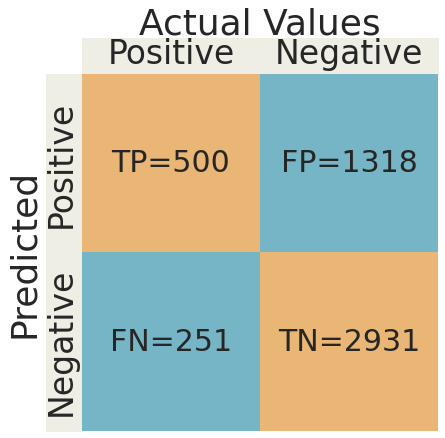

In [ ]:
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()


In [ ]:
params =  {
    'penalty':['l2','l1'], 'C':[1,2,3,4,5,6,7,8,9,10,11,12,15], 'max_iter':[10,15,16,17,18,19,20,21],'solver':['liblinear','newton-cg','sag']
}

In [ ]:
log_grid = GridSearchCV(estimator=logmodel,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=3)

In [ ]:
log_grid.fit(X_train, y_train)

Fitting 10 folds for each of 624 candidates, totalling 6240 fits
[CV 1/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.695 total time=   0.0s
[CV 7/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=1, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=  

[CV 1/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.682 total time=   0.0s
[CV 2/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 6/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.695 total time=   0.0s
[CV 7/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=1, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=1, max_iter=15, penalty=l1, solver=newton-c

[CV 1/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.695 total time=   0.0s
[CV 7/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=1, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=1, max_iter=17, penalty=l2, solver=newton-c

[CV 4/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 6/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.695 total time=   0.0s
[CV 7/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=1, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=1, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=1, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=1, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=1, max_iter=18, penalty=l1, solver=newton-cg;, sc

[CV 7/10] END C=1, max_iter=20, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=1, max_iter=20, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=1, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=1, max_iter=20, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=1, max_iter=20, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.0s
[CV 7/10] END C=1, max_iter=20, penalty=l2, solver=newton-c

[CV 2/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=2, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=2, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=2, max_iter=10, penalty=l2, solver=newton-c

[CV 2/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 6/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.695 total time=   0.0s
[CV 7/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=2, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=2, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=2, max_iter=15, penalty=l1, solver=newton-cg;

[CV 10/10] END C=2, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=2, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=2, max_iter=17, penalty=l2, solver=newton-

[CV 3/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=2, max_iter=19, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=2, max_iter=19, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=2, max_iter=19, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=2, max_iter=19, penalty=l2, solver=newton-c

[CV 7/10] END C=2, max_iter=20, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=2, max_iter=20, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=2, max_iter=20, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=2, max_iter=20, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=2, max_iter=20, penalty=l1, solver=newton-cg;, score=na

[CV 1/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=3, max_iter=10, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=3, max_iter=10, penalty=l2, solver=sag;, sc

[CV 10/10] END C=3, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=3, max_iter=15, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=3, max_iter=16, penalty=l2, so

[CV 10/10] END C=3, max_iter=17, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.685 total time=   0.0s
[CV 2/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.689 total time=   0.0s
[CV 3/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.679 total time=   0.0s
[CV 4/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.693 total time=   0.0s
[CV 5/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.697 total time=   0.0s
[CV 6/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.695 total time=   0.0s
[CV 7/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.706 total time=   0.0s
[CV 8/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.699 total time=   0.0s
[CV 9/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.690 total time=   0.0s
[CV 10/10] END C=3, max_iter=17, penalty=l2, solver=sag;, score=0.680 total time=   0.0s
[CV 1/10] END C=3, max_i

[CV 6/10] END C=3, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=3, max_iter=19, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=3, max_iter=19, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=3, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=3, max_iter=19, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=3, max_iter=19, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=3, max_iter=19, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=3, max_iter=19, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=3, max_iter=19, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=3, max_iter=19, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=3, max_iter=19, penalty=l2, solver=newton-c

[CV 6/10] END C=3, max_iter=20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=3, max_iter=20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=3, max_iter=20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=3, max_iter=20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=3, max_iter=20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=3, max_iter=21, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7

[CV 7/10] END C=4, max_iter=10, penalty=l2, solver=sag;, score=0.703 total time=   0.0s
[CV 8/10] END C=4, max_iter=10, penalty=l2, solver=sag;, score=0.691 total time=   0.0s
[CV 9/10] END C=4, max_iter=10, penalty=l2, solver=sag;, score=0.700 total time=   0.0s
[CV 10/10] END C=4, max_iter=10, penalty=l2, solver=sag;, score=0.678 total time=   0.0s
[CV 1/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.682 total time=   0.0s
[CV 2/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.681 total time=   0.0s
[CV 4/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 6/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=4, max_iter=10, penalty=l1, solver=liblinear;, score=0.708 total ti

[CV 7/10] END C=4, max_iter=16, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=4, max_iter=16, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=4, max_iter=16, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=4, max_iter=16, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=4, max_iter=16, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=4, max_iter=16, penalty=l2, solver=newton-c

[CV 9/10] END C=4, max_iter=17, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=4, max_iter=17, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=4, max_iter=17, penalty=l1, solver=newton-cg;, score=nan to

[CV 2/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=4, max_iter=19, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=4, max_iter=19, penalty=l2, solver=sag;, score=0.681 total time=   0.0s
[CV 2/10] END C=4, max_iter=19, penalty=l2, solver=sag;, score=0.

[CV 4/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=4, max_iter=21, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=4, max_iter=21, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=4, max_iter=21, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=4, max_iter=21, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=4, max_iter=21, penalty=l2, solver=newton-c

[CV 5/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=5, max_iter=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=5, max_iter=15, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END

[CV 8/10] END C=5, max_iter=16, penalty=l2, solver=sag;, score=0.699 total time=   0.0s
[CV 9/10] END C=5, max_iter=16, penalty=l2, solver=sag;, score=0.691 total time=   0.0s
[CV 10/10] END C=5, max_iter=16, penalty=l2, solver=sag;, score=0.680 total time=   0.0s
[CV 1/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=5, max_iter=16, penalty=l1, solver=liblinear;, score=0.697 to

[CV 3/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=5, max_iter=18, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=5, max_iter=18, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=5, max_iter=18, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=5, max_iter=18, penalty=l2, solver=newton-c

[CV 8/10] END C=5, max_iter=19, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=5, max_iter=19, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=5, max_iter=19, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=5, max_iter=19, penalty=l1, solver=newton-cg;, score=nan 

[CV 2/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=5, max_iter=21, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=5, max_iter=21, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 2/10] END C=5, max_iter=21, penalty=l2, solver=sag;, score=0.

[CV 2/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=6, max_iter=15, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=6, max_iter=15, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=6, max_iter=15, penalty=l2, solver=newton-c

[CV 4/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=6, max_iter=16, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=6, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=6, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=6, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=6, max_iter=16, penalty=l1, solver=newton-cg;, sc

[CV 8/10] END C=6, max_iter=18, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=6, max_iter=18, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=6, max_iter=18, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=6, max_iter=18, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=6, max_iter=18, penalty=l2, solver=newton-c

[CV 1/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=6, max_iter=20, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=6, max_iter=20, penalty=l2, solver=newton-c

[CV 1/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=6, max_iter=21, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=6, max_iter=21, penalty=l1, solver=newton-c

[CV 4/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=7, max_iter=15, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=7, max_iter=15, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=7, max_iter=15, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=7, max_iter=15, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=7, max_iter=15, penalty=l2, solver=newton-c

[CV 10/10] END C=7, max_iter=16, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END C=7, max_iter=16, penalty=l1, solver=newton-cg;, score=nan tot

[CV 2/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=7, max_iter=18, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=7, max_iter=18, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 2/10] END C=7, max_iter=18, penalty=l2, solver=sag;, score=0.

[CV 6/10] END C=7, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=7, max_iter=20, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=7, max_iter=20, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=7, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=7, max_iter=20, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=7, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=7, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=7, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=7, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=7, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=7, max_iter=20, penalty=l2, solver=newton-c

[CV 9/10] END C=7, max_iter=21, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=7, max_iter=21, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=7, max_iter=21, penalty=l1, solver=newton-cg;, score=nan to

[CV 1/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=8, max_iter=15, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=8, max_iter=15, penalty=l2, solver=sag;, sc

[CV 6/10] END C=8, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=8, max_iter=17, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=8, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=8, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=8, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=8, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=8, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=8, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=8, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=8, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=8, max_iter=17, penalty=l2, solver=newton-c

[CV 7/10] END C=8, max_iter=18, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=8, max_iter=18, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=8, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=8, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=8, max_iter=18, penalty=l1, solver=newton-cg;, score=na

[CV 1/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=8, max_iter=20, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=8, max_iter=20, penalty=l2, solver=sag;, sc

[CV 3/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=9, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=9, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=9, max_iter=10, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=9, max_iter=10, penalty=l2, solver=newton-c

[CV 8/10] END C=9, max_iter=15, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=9, max_iter=15, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=9, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=9, max_iter=15, penalty=l1, solver=newton-cg;, score=nan 

[CV 8/10] END C=9, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=9, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=9, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=9, max_iter=17, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=9, max_iter=17, penalty=l2, solver=newton-c

[CV 9/10] END C=9, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=9, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=9, max_iter=18, penalty=l1, solver=newton-cg;, score=nan to

[CV 1/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=9, max_iter=20, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=9, max_iter=20, penalty=l2, solver=sag;, sc

[CV 8/10] END C=10, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=10, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=10, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=10, max_iter=10, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=10, max_iter=10, penalty=l2, solv

[CV 10/10] END C=10, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=15, penalty=l1, solver=newton-cg;, sc

[CV 3/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=10, max_iter=17, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=10, max_iter=17, penalty=l2, solver=sag;, score=0.678 total time=   0.0s
[CV 2/10] END C=10, max_iter=17, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/10] END C=10, max_iter=17, penalty=l2, solver=sag;, sco

[CV 7/10] END C=10, max_iter=18, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=18, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 9/10] END C=10, max_iter=18, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 10/10] END C=10, max_iter=18, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=10, max_iter=19, penalty=l2, solver=liblinear;, score=0.707 total

[CV 9/10] END C=10, max_iter=20, penalty=l2, solver=sag;, score=0.692 total time=   0.0s
[CV 10/10] END C=10, max_iter=20, penalty=l2, solver=sag;, score=0.678 total time=   0.1s
[CV 1/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.683 total time=   0.0s
[CV 2/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 3/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=10, max_iter=20, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=10, max_iter=20, penalty=l1, solver=liblinear

[CV 4/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=11, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=11, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=11, max_iter=10, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=11, max_iter=10, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=11, max_iter=10, penalty=l2, solv

[CV 7/10] END C=11, max_iter=15, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=11, max_iter=15, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=11, max_iter=15, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=11, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=11, max_iter=15, penalty=l1, solver=newton-cg

[CV 8/10] END C=11, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=11, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=11, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=11, max_iter=17, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=11, max_iter=17, penalty=l2, solv

[CV 9/10] END C=11, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=11, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=11, max_iter=18, penalty=l1, solver=newton-cg;, s

[CV 2/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=11, max_iter=20, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=11, max_iter=20, penalty=l2, solver=sag;, score=0.681 total time=   0.0s
[CV 2/10] END C=11, max_iter=20, penalty=l2, solver=sag

[CV 4/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=12, max_iter=10, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=10, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=12, max_iter=10, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=12, max_iter=10, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=12, max_iter=10, penalty=l2, solv

[CV 7/10] END C=12, max_iter=15, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=12, max_iter=15, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=12, max_iter=15, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=12, max_iter=15, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=12, max_iter=15, penalty=l1, solver=newton-cg

[CV 6/10] END C=12, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=12, max_iter=17, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=12, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=12, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=12, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=12, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=12, max_iter=17, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=12, max_iter=17, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=12, max_iter=17, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=12, max_iter=17, penalty=l2, solv

[CV 5/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=12, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=12, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=12, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=12, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=12, max_iter=18, penalty=l1, solver=newto

[CV 9/10] END C=12, max_iter=20, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=12, max_iter=20, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=12, max_iter=20, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=12, max_iter=20, penalty=l2, solv

[CV 10/10] END C=12, max_iter=21, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END C=12, max_iter=21, penalty=l1, solver=newton-cg;, sc

[CV 2/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=15, max_iter=15, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/10] END C=15, max_iter=15, penalty=l2, solver=sag;, score=0.683 total time=   0.0s
[CV 2/10] END C=15, max_iter=15, penalty=l2, solver=sag

[CV 3/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.680 total time=   0.0s
[CV 4/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 6/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=15, max_iter=17, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=15, max_iter=17, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=15, max_iter=17, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=15, max_iter=17, penalty=l2, solv

[CV 6/10] END C=15, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 7/10] END C=15, max_iter=18, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 8/10] END C=15, max_iter=18, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 9/10] END C=15, max_iter=18, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=15, max_iter=18, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=15, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=15, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=15, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=15, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=15, max_iter=18, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=15, max_iter=18, penalty=l1, solver=newton-

[CV 10/10] END C=15, max_iter=20, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 2/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 4/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 5/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 6/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 7/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 8/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 9/10] END C=15, max_iter=20, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 10/10] END C=15, max_iter=20, penalty=l2, sol

[CV 9/10] END C=15, max_iter=21, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 10/10] END C=15, max_iter=21, penalty=l1, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=15, max_iter=21, penalty=l1, solver=newton-cg;, s

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15],
                         'max_iter': [10, 15, 16, 17, 18, 19, 20, 21],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'newton-cg', 'sag']},
             verbose=3)

In [ ]:
log_grid.best_params_

{'C': 2, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
logmodel = LogisticRegression(C= 2, max_iter = 10, penalty = 'l2', solver = 'sag')

In [ ]:
logmodel.fit(X_train,y_train)
prediction=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,prediction))
print("Train Accuracy: ", accuracy_score(y_train, logmodel.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47      1818
           1       0.71      0.87      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.62      0.63      5000
weighted avg       0.68      0.69      0.67      5000

Train Accuracy:  0.6912
Test Accuracy:  0.6906


In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)

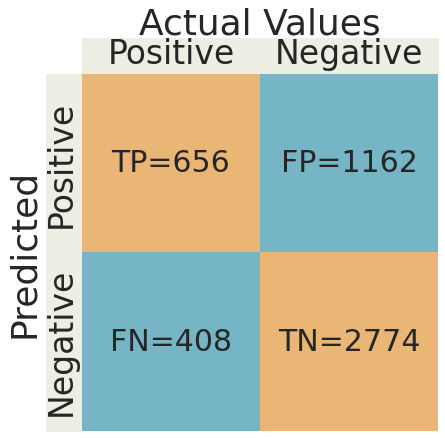

In [ ]:
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

#**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {'C': [10000,100000,1000000], 'gamma':[0.0001,0.00001,.0000001]}

In [ ]:
svc_grid= GridSearchCV(estimator=svc,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=3)

In [ ]:
svc_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ............C=10000, gamma=0.0001;, score=0.686 total time=  14.2s
[CV 2/10] END ............C=10000, gamma=0.0001;, score=0.699 total time=  14.7s
[CV 3/10] END ............C=10000, gamma=0.0001;, score=0.678 total time=  15.5s
[CV 4/10] END ............C=10000, gamma=0.0001;, score=0.695 total time=  18.4s
[CV 5/10] END ............C=10000, gamma=0.0001;, score=0.687 total time=  15.8s
[CV 6/10] END ............C=10000, gamma=0.0001;, score=0.686 total time=  15.5s
[CV 7/10] END ............C=10000, gamma=0.0001;, score=0.708 total time=  14.4s
[CV 8/10] END ............C=10000, gamma=0.0001;, score=0.687 total time=  14.5s
[CV 9/10] END ............C=10000, gamma=0.0001;, score=0.700 total time=  14.3s
[CV 10/10] END ...........C=10000, gamma=0.0001;, score=0.682 total time=  14.2s
[CV 1/10] END .............C=10000, gamma=1e-05;, score=0.682 total time=  12.9s
[CV 2/10] END .............C=10000, gamma=1e-05;

GridSearchCV(cv=10, estimator=SVC(), n_jobs=1,
             param_grid={'C': [10000, 100000, 1000000],
                         'gamma': [0.0001, 1e-05, 1e-07]},
             verbose=3)

In [ ]:
svc_grid.best_params_

{'C': 10000, 'gamma': 1e-05}

In [ ]:
svc = SVC(C= 10000, gamma= 1e-05, probability = True)

In [ ]:
svc.fit(X_train,y_train)
prediction=svc.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))
print("Train Accuracy: ", accuracy_score(y_train, svc.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.66      0.32      0.43      1818
           1       0.70      0.91      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.69      0.69      0.66      5000

Train Accuracy:  0.69295
Test Accuracy:  0.693


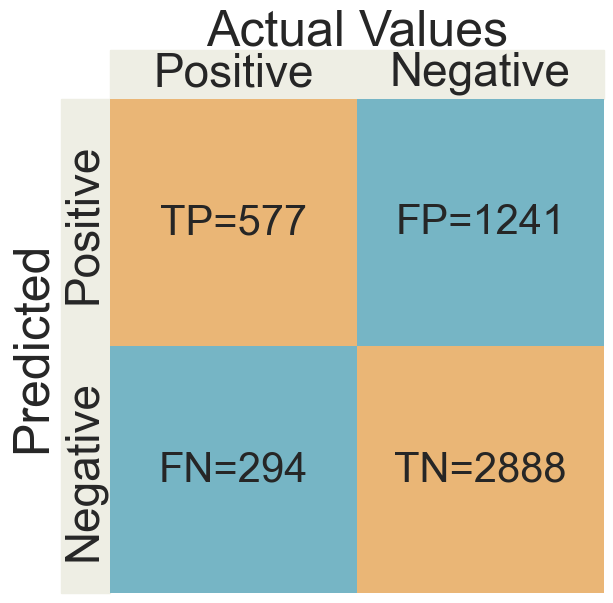

In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

#**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
n_classes = np.unique(y)


In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

In [ ]:
bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 10.0, 'binarize': None, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.686



In [ ]:
NB = BernoulliNB(alpha= 10.0, binarize= None, class_prior= None, fit_prior= True)
NB.fit(X_train,y_train)
prediction=NB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,prediction))
print("Train Accuracy: ", accuracy_score(y_train, NB.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.33      0.44      1818
           1       0.70      0.89      0.78      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.61      0.61      5000
weighted avg       0.67      0.69      0.66      5000

Train Accuracy:  0.68675
Test Accuracy:  0.6868


In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)

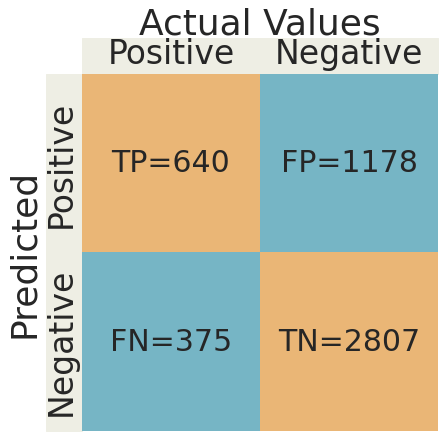

In [ ]:
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()